In [212]:
# Implement Layers of a Nueral Net by hand
import torch
import os
import matplotlib.pyplot as plt

In [213]:
def get_absolute_directory_path(folder_name):
    current_dir = os.path.abspath(__file__)
    while not os.path.exists(os.path.join(current_dir, folder_name)):
        current_dir = os.path.dirname(current_dir)
    return os.path.join(current_dir, folder_name)

In [214]:
dataset = open('../names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(dataset))))
index_lookup_table = {index + 1: char for index, char in enumerate(chars)}
index_lookup_table[0] = '.'

# index_lookup_table

In [215]:
xenc = torch.nn.functional.one_hot(torch.tensor([0]), num_classes=27).float()
elems = xenc.clone().detach()
print(elems)
# plt.plot(elems)


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [216]:
# invert atoi into i2c
ctoi = {c: ix + 1 for ix, c in enumerate(chars)}
itoc = {ix: c for c, ix in ctoi.items()}
itoc[0] = '.'
ctoi["."] = 0

In [265]:
block_size = 3  # number of characters to consider / inputs to take in

X = []  # X is input
Y = []  # Y is the output. in test Y is the expected value

for word in dataset:
    print("================")
    print(f'Word: "{word}"')
    context = [0] * block_size  # A zero vector of size {block_size}
    for ch in word + '.':  # add a period to the end of the word, or ending buffer to know sentence/word complete
        print(f"starting context {context}")
        ix = ctoi[ch]  # convert character to index
        X.append(context)  # the input in space
        Y.append(ix)  # the output in space 
        print(f'({context} --> {ix})', '<==>', (''.join(itoc[i] for i in context), '----->', itoc[ix]))
        context = context[1:] + [ix]
        print(f"ending context {context}")
    print("================")

X = torch.tensor(X)
print(X)
Y = torch.tensor(Y)
print(Y)

In [218]:
print(X)
print(X.shape)

print(Y)
print(Y.shape)

print(f"{X.shape}: {X.dtype}", f"{Y.shape}: {Y.dtype}")

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])
torch.Size([228146, 3])
tensor([ 5, 13, 13,  ..., 26, 24,  0])
torch.Size([228146])
torch.Size([228146, 3]): torch.int64 torch.Size([228146]): torch.int64


In [219]:
## Create Hyper parameters ##
C = torch.randn((27, 2))  # embedding
# print(f'{C=}')
# print(f'{C.shape=}')

emb = C[X]  # create embedding vector from X inputs
# print(f'{emb.shape=}')
# print(f'{emb=}')

# matrix of 1 hot vectors each with input of 5 on each of the 27 neurons in this layer (by) C /embedding/
# torch.nn.functional.one_hot(torch.tensor(5),num_classes=27).float() @ C

# x = 3*2, because block size is 3 and embedding is 2d
# y = any number of neurons, because we are not sure how many neurons we want to use
W1 = torch.randn((6, 100))

# biases, always equal to the number of neurons
b1 = torch.randn(100)

# torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1) # wont scale 
# torch.cat(torch.unbind(emb,1),1) # scales better when inputs>3 or n inputs

# hidden layer 1
# (emb @ W1) + b1 # cant multiply 15x2 by 6x100
# hidden_layer_1_vector = emb.view(5, 6) @ W1 + b1 # cast emb to 5,6 by direct views() shape casting

hidden_layer_1_vector = emb.view(-1, 6) @ W1 + b1  # cast emb to 5,6 by using inference
hidden_layer_2_vector = torch.tan(hidden_layer_1_vector)
# print(hidden_layer_2_vector)
# print(hidden_layer_2_vector.shape)

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

# manual classification loss algorithm, bad if vector contains inputs that are not very large
# counts = logits.exp()
# prob = counts/counts.sum(1,keepdims=True)
# prob[torch.arange(5),Y] # pick next char, x should be number of letters in dataset
# loss = -prob[torch.arange(5),Y].log().mean() # nll

# classification loss algorithm (cross_entropy)
# used because can handle large inputs over our manual implementation 
# loss = torch.nn.functional.cross_entropy(logits, Y)


C=tensor([[-0.3489, -0.0138],
        [ 3.1873, -1.0406],
        [-1.0950,  0.8963],
        [ 1.3407,  0.5711],
        [ 0.6899, -2.1037],
        [-0.7282,  0.8962],
        [ 0.2184,  0.9250],
        [-0.0301, -1.2749],
        [ 0.6042, -0.1556],
        [-0.3455, -0.3596],
        [ 0.9871, -0.0259],
        [ 1.1818, -0.3638],
        [ 0.0803, -0.1895],
        [ 0.2158, -2.0105],
        [ 0.3569,  0.2760],
        [ 0.7965,  0.2115],
        [ 0.8549, -2.5525],
        [ 0.5544,  1.1271],
        [ 0.2767,  0.0744],
        [-0.8770,  0.1751],
        [ 0.2899, -0.5566],
        [ 1.5136, -1.8207],
        [ 1.7482, -1.2141],
        [ 0.9130,  2.5961],
        [-0.9882, -0.4074],
        [ 1.7810, -1.0791],
        [-1.0193,  1.3602]])
C.shape=torch.Size([27, 2])
emb.shape=torch.Size([228146, 3, 2])
emb=tensor([[[-0.3489, -0.0138],
         [-0.3489, -0.0138],
         [-0.3489, -0.0138]],

        [[-0.3489, -0.0138],
         [-0.3489, -0.0138],
         [-0.7282,  0.896

In [282]:
# construct a set of learning rates to iterate over and fine the best learning rate for our model
lre = torch.linspace(-3, 0, 10000)  # create 1000 learning rates between 10^-3 and 10^0
lrs = 10 ** lre  # convert to 10^x to get between 0 and 1

lri = []
lossi = []
stepi = []

C = torch.randn((27, 2))
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

# print(sum(p.nelement() for p in parameters)) # total elements in all parameters
# print(any(p is None for p in parameters)) # No parameters are None

In [285]:
# Track operations for backpropagation
for parameter in parameters:
    parameter.requires_grad = True

for _ in range(10000):
    ### iterate over whole data set ###############
    # # forward pass of the model
    # emb = C[X]
    # h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    # logits = h @ W2 + b2  # output of layer2
    # 
    # ## Tuning ##
    # loss = torch.nn.functional.cross_entropy(logits, Y)
    # for parameter in parameters: # zero gradients
    #     parameter.grad = None
    # loss.backward() # backpropagation
    # for parameter in [C, W1, b1, W2, b2]: # update weights
    #     parameter.data += -0.1 * parameter.grad
    # =============================================================

    ## iterate over mini batch ####################
    # mini batch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass of the model
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2

    ## Tuning ## 
    loss = torch.nn.functional.cross_entropy(logits, Y[ix])
    # print(f'loss={loss.item()}')
    for parameter in parameters:  # zero gradients
        parameter.grad = None
    loss.backward()  # backpropagation
    lr = lrs[_]  # for plotting purposes
    lr = 0.1  # check graph to find best learning rate 10^-1
    for parameter in [C, W1, b1, W2, b2]:  # update weights
        parameter.data += -lr * parameter.grad
    # =============================================================

    # track stats
    lri.append(lre[_])
    stepi.append(_)
    # lossi.append(loss.item())
    lossi.append(loss.log10().item())

print(f'loss post-optimize={loss.item()}')

loss post-optimize=2.5692601203918457


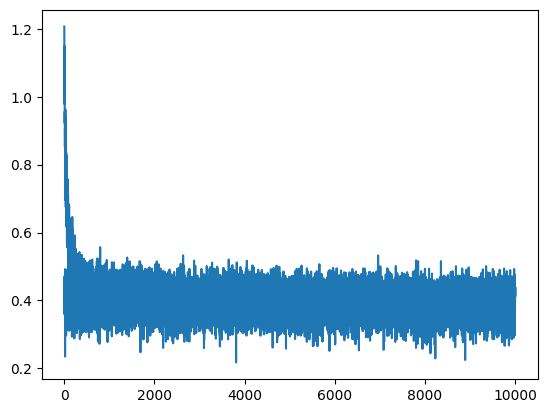

In [286]:
# plt.plot(lri,lossi)
plt.plot(stepi, lossi)

In [267]:
def build_dataset(dataset):
    block_size = 3  # number of characters to consider / inputs to take in

    X = []  # X is input
    Y = []  # Y is the output. in test Y is the expected value

    for word in dataset:
        context = [0] * block_size  # A zero vector of size {block_size}
        for ch in word + '.':  # add a period to the end of the word, or ending buffer to know sentence/word complete
            ix = ctoi[ch]  # convert character to index
            X.append(context)  # the input in space
            Y.append(ix)  # the output in space 
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y


import random

random.seed(42)
random.shuffle(dataset)
n1 = int(0.8 * len(dataset))
n2 = int(0.9 * len(dataset))

# training, dev/validation, test
# 80% training, 10% dev, 10% test
X_train, Y_train = build_dataset(dataset[:n1])
X_dev, Y_dev = build_dataset(dataset[n1:n2])
X_test, Y_test = build_dataset(dataset[n2:])


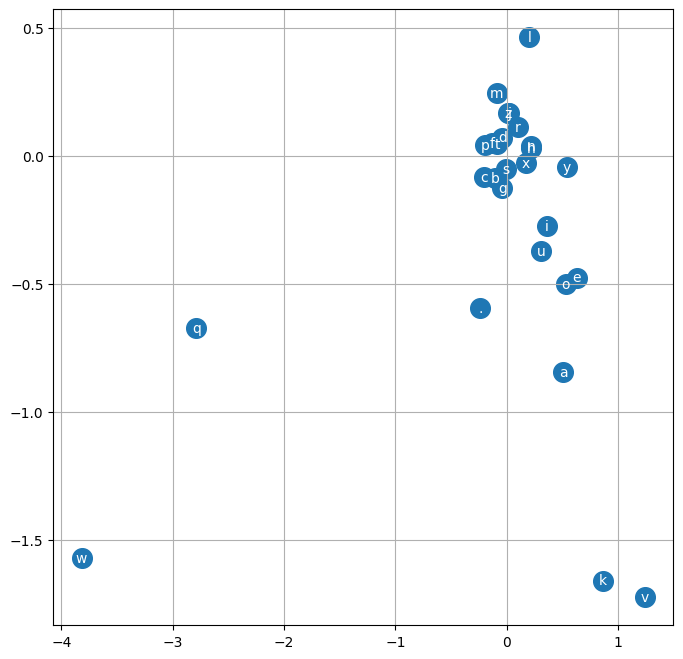

In [279]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(27):
    plt.text(C[i, 0].item(), C[i, 1].item(), itoc[i], ha="center", va="center", color="white")
plt.grid('minor')


In [294]:
g = torch.Generator().manual_seed(2147483647)

def nueral_net_algorithm(
        seed_generator,
):
    out = []
    context = [0] * block_size
    while True:
        # forward pass
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)  # (1, block_size,d)
        logits = h @ W2 + b2
        probs = torch.nn.functional.softmax(logits, dim=1)
        ix = torch.multinomial(probs,num_samples=1,generator=seed_generator).item() # sample
        context = context[1:] + [ix]
        if ix == 0:
            break
    return ''.join(itoc[i] for i in out)


# Sample NueroNet
nueral_net_algorithm(g)

''